<a href="https://colab.research.google.com/github/astroviki/NumericalMethods/blob/main/GAKepler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()

from astropy.table import Table


Saving CescoThetaAquilea.txt to CescoThetaAquilea.txt


In [7]:
!less "CescoThetaAquilea.txt"

CescoThetaAquilea.txt: No such file or directory


In [10]:
data = Table.read('CescoThetaAquilea.txt', format='pandas.csv', delim_whitespace=True, names=['JD', 'Vrad', 'error'])
data

JD,Vrad,error
float64,float64,float64
7642.75,-21.8,2.5
7644.75,12.7,2.5
7647.75,-30.2,2.5
7648.71,-39.8,2.5
7648.82,-44.9,2.5
7650.68,-41.2,2.5
7652.7,-44.7,2.5
7653.78,-45.2,2.5
7656.67,-38.1,2.5


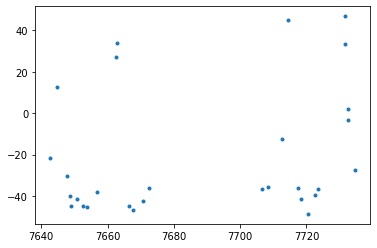

In [12]:
import matplotlib.pyplot as plt

plt.plot(data['JD'],data['Vrad'],'.')

In [27]:
import numpy as np
from astropy.timeseries import LombScargle

t0 = np.min(data['JD'])
t = data['JD']-t0
y = data['Vrad']

y_error = data['error']

frequency, power = LombScargle(t, y).autopower()

#plt.plot(1./frequency,power)
#plt.xlim(0,100)

period_estimate = 1.0/frequency[np.argmax(power)] 

print('Period estimate %.2f ' % period_estimate)

Period estimate 17.33 


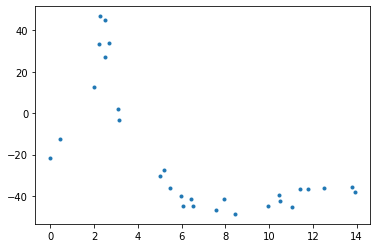

In [33]:
phases = np.mod(t,period_estimate)
sort_phases_indexes = np.argsort(phases)
sort_phases = phases[np.argsort(phases)]
sort_vrad = y[sort_phases_indexes]

plt.plot(sort_phases,sort_vrad,'.')